In [2]:
# importing numpy

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

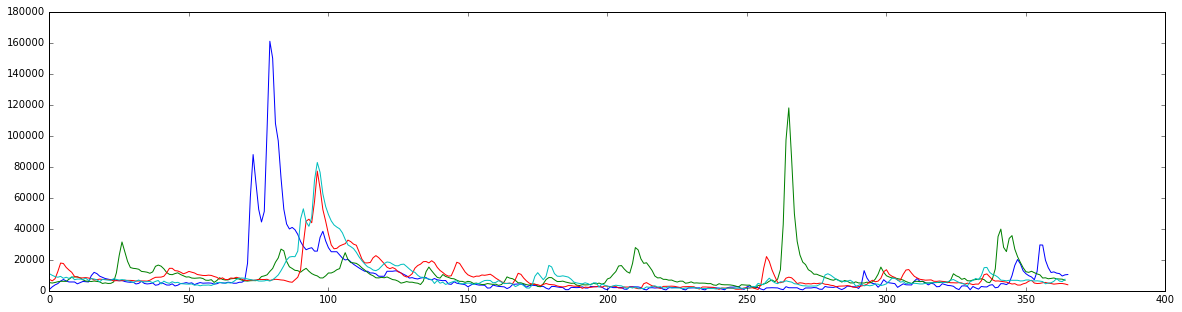

In [53]:
# 1. Basic Line Plotting
# Reproduce this image, showing river flow during flood years of the Merrimack River
# The data used to create this plot can be found un t. You may read in the data any way you want. That is, you may extract 
# the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could 
# read in values from another datafile, e.g., from another river gauge. Pay attention to detail.


unt = open('merrimack_discharge.dat.txt')


def merr(year):
    year = str(year)
    discharge = []
    unt.seek(0)
    for value in unt.readlines():
        value = value.split()
        if value[0] == 'USGS':
            years = value[2].split('-')[0]
            if years == year:
                d = value[3]
                discharge.append(d)
    return discharge

# Undergraduates: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
# Graduates: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in 
# the file), and the shaded region representing one standard deviation from the mean.

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(merr(1936), label='1936')
ax.plot(merr(1938), label='1938')
ax.plot(merr(1960), label='1960')
ax.plot(merr(1987), label='1987')

<a list of 86 text.Text objects>

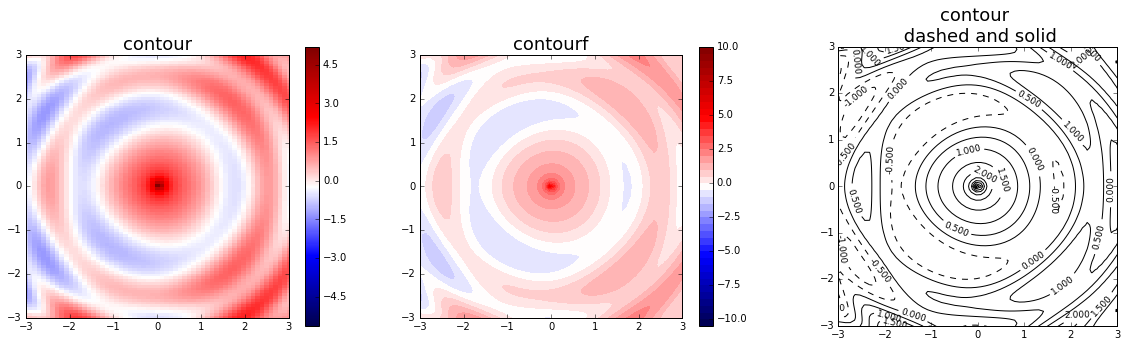

In [56]:
# 2. Plot 2D function multiple ways

# Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
levels = np.arange(-10.5,10.5,.5)


# Create three different plots of Z over the X-Y plane. Use:
# pcolor
# contourf
## contour (with dashed lines for negative values, solid lines for positive values)
## Make sure the aspect ratio is 1.

fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1, 3, 1, aspect='equal')
ax.set_xlim(-3, 3)   # defined between -3 and 3 in both x and y
ax.set_ylim(-3, 3)
ax.set_title('contour', fontsize=18)
plot = ax.pcolor(X, Y, Z, cmap='seismic')  # use the magma colormap 
fig.colorbar(plot)

ax2 = fig.add_subplot(1, 3, 2, aspect='equal')
ax2.set_xlim(-3, 3)   # defined between -3 and 3 in both x and y
ax2.set_ylim(-3, 3)
ax2.set_title('contourf', fontsize=18)
plot = ax2.contourf(X, Y, Z, cmap='seismic', levels=levels)  # use the magma colormap
fig.colorbar(plot)

ax3 = fig.add_subplot(1, 3, 3, aspect='equal')
ax3.set_xlim(-3, 3)   # defined between -3 and 3 in both x and y
ax3.set_ylim(-3, 3)
ax3.set_title('contour \n dashed and solid', fontsize=18)
plt.rcParams['contour.negative_linestyle'] = 'dashed'
plot = plt.contour(X, Y, Z, colors='black', levels=levels)
plt.clabel(plot, fontsize=9, inline=1)




(20.940708880374167,
 22.187310376636798,
 20.024230364902369,
 31.989070998618416)

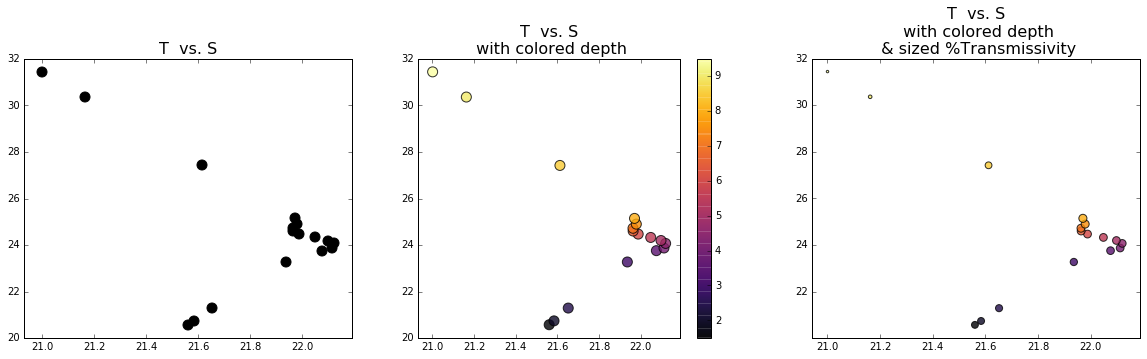

In [60]:
# 3. Read 2D data and make scatter plot

# Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD 
# data from one of the files stored in data/MCH. Read in the data and make the following plots as subplots in one figure:
# plot temperature vs. salinity, using black dots to mark the data points.
# plot temperature vs. salinity, and color the markers with the depth;
# plot temperature vs. salinity, color the markers with the depth, and then size the markers 
# with another property of your choice from the file.
# Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

data = np.loadtxt('m1001a.cnv2', comments='*', skiprows=45)

temp = data[:,2]
salt = data[:,5]
depth = data[:,1]
trans = data[:,9]

fig = plt.figure(figsize=(20,5))

# ax = fig.add_subplot(1, 3, 1)
# ax.set_title('temperature  vs. salinity', fontsize=16)
# ax.plot(temp, salt, 'k.', markersize=20) 

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('T  vs. S', fontsize=16)
plot1 = ax1.scatter(temp, salt, s=100, c='k', alpha=1.0)
ax1.axis('tight')


ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('T  vs. S\n with colored depth', fontsize=16)
plot2 = ax2.scatter(temp, salt, s=100, c=depth, cmap='inferno' , alpha=0.8)  
cbar = plt.colorbar(plot2)
ax2.axis('tight')

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('T  vs. S\n with colored depth\n & sized %Transmissivity', fontsize=16)
plot3 = ax3.scatter(temp, salt, s=trans, c=depth, cmap='inferno' , alpha=0.8) 
ax3.axis('tight')
# fig.colorbar(plot3)


# how do I do colorbar??

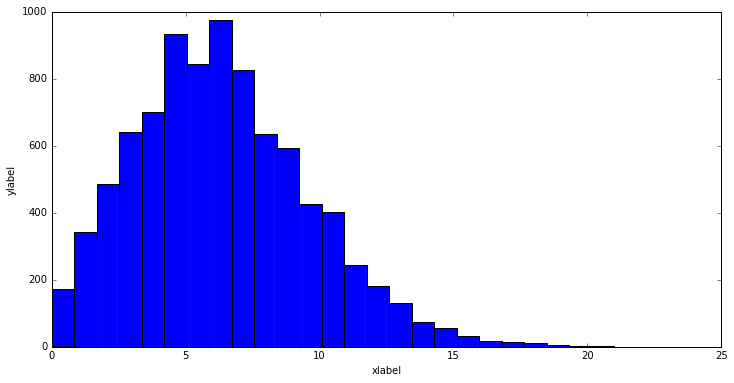

In [115]:
# 4. Histogram
# Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]
 
# making 1D histogram of wind speed
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(wind_speed, bins=25)
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')


# Bonus: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

# This is a right skewed distribtion

# import scipy.stats as stats

# maxwell = stats.maxwell
# data = maxwell.rvs(loc=0, scale=5, size=10000)

# params = maxwell.fit(data, floc=0)

# plt.plot(wind_speed, maxwell.pdf(wind_speed), lw=3)
# plt.show()

-580.047166824


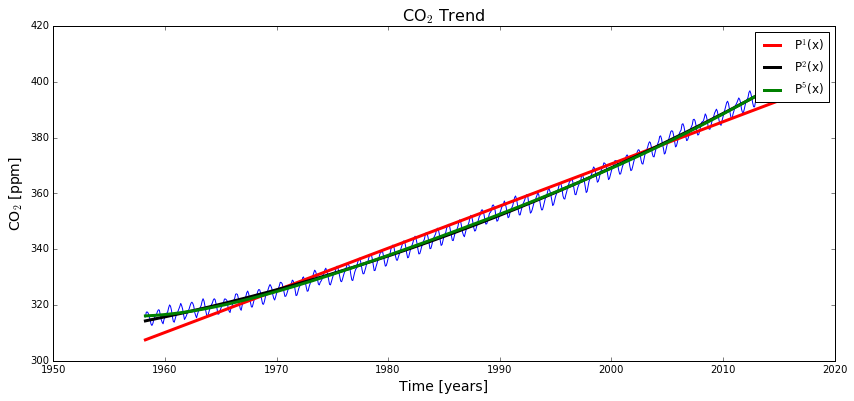

In [65]:
# 5. (Grad) Fit and line and plot
# Load in the Mauna Loa carbon dioxide dataset:
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')

# loading in data
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4] 
time = years + months/12 # incorporating the months into the year


# Fit a 1st (straight line), 2nd, and 5th order polynomial to the data. Use your polynomial fits to predict CO2 in the year 2100. 

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)  
ax.plot(time, co2)
ax.set_xlabel('Time [years]', fontsize=14) # how do you combine months and years again??
ax.set_ylabel('CO$_2$ [ppm]', fontsize=14)
ax.set_title('CO$_2$ Trend', fontsize=16)

# first polynomial fit
poly1 = np.polyfit(time, co2, 1)
p1 = ax.plot(time, poly1[1]+poly1[0]*time,'r',label='P$^1$(x)',lw=3)

# second polynomial fit
poly2 = np.polyfit(time, co2, 2)
p2 = ax.plot(time, poly2[2]+poly2[1]*time+poly2[0]*time**2,'k',label='P$^2$(x)',lw=3)

# fifth polynomial fit
poly5 = np.polyfit(time, co2, 5)
p5 = ax.plot(time, poly5[5]+poly5[4]*time+poly5[3]*time**2+poly5[2]*time**3+poly5[1]*time**4+poly5[0]*time**5,'g',label='P$^5$(x)',lw=3)

ax.legend() # ??????

# Use your polynomial fits to predict CO2 in the year 2100. 
# Which prediction do you think is most accurate?

# fifth polynomial fit
# future = 
poly5 = np.polyfit(time, co2, 5)
p5 = poly5[5]+poly5[4]*2100+poly5[3]*2100**2+poly5[2]*2100**3+poly5[1]*2100**4+poly5[0]*2100**5
print(p5)

In [45]:
print(time)

[ 1958.25        1958.33333333  1958.41666667  1958.5         1958.58333333
  1958.66666667  1958.75        1958.83333333  1958.91666667  1959.
  1959.08333333  1959.16666667  1959.25        1959.33333333  1959.41666667
  1959.5         1959.58333333  1959.66666667  1959.75        1959.83333333
  1959.91666667  1960.          1960.08333333  1960.16666667  1960.25
  1960.33333333  1960.41666667  1960.5         1960.58333333  1960.66666667
  1960.75        1960.83333333  1960.91666667  1961.          1961.08333333
  1961.16666667  1961.25        1961.33333333  1961.41666667  1961.5
  1961.58333333  1961.66666667  1961.75        1961.83333333  1961.91666667
  1962.          1962.08333333  1962.16666667  1962.25        1962.33333333
  1962.41666667  1962.5         1962.58333333  1962.66666667  1962.75
  1962.83333333  1962.91666667  1963.          1963.08333333  1963.16666667
  1963.25        1963.33333333  1963.41666667  1963.5         1963.58333333
  1963.66666667  1963.75        1963.83

In [61]:
ax.legend?

In [50]:
# 6. (Grad) Make a movie
# ffmpeg
# look for something like homebrew for mac... find a pacakge for this to find ffmpeg
# do your zipped up images(just one) and animations

# load file
lon, lat, mean_surf_temp = np.load('..\python4geosciences\data\surface_temp_predictions.npz', encoding='latin1')['arr_0']

print(mean_surf_temp)

# from mpl_toolkits.basemap import Basemap

# m = Basemap()    # Create a map instance. The default will give us the most boring map projection of all.

# m.drawcoastlines()
# # m.fillcontinents()

[[[ 228.80342102  228.80342102  228.80342102 ...,  228.7555542
    228.75556946  228.7233429 ]
  [ 230.02503967  229.83369446  229.58860779 ...,  230.4730835
    230.28662109  230.04290771]
  [ 233.14186096  232.77742004  231.79881287 ...,  233.82635498
    233.46844482  233.4914093 ]
  ..., 
  [ 258.44119263  258.56741333  258.64337158 ...,  258.35906982
    258.38174438  258.38082886]
  [ 257.762146    257.89959717  257.89459229 ...,  257.72232056
    257.69747925  257.78445435]
  [ 257.05697632  257.05740356  257.06072998 ...,  257.05776978
    257.05691528  257.05688477]]

 [[ 228.45109558  228.45109558  228.45109558 ...,  228.4072113   228.4072113
    228.37754822]
  [ 228.51597595  228.31858826  228.06378174 ...,  228.96076965
    228.77436829  228.53210449]
  [ 231.34394836  230.93554688  229.90332031 ...,  232.16435242
    231.76591492  231.75004578]
  ..., 
  [ 257.96206665  258.17153931  258.28204346 ...,  257.6081543
    257.72305298  257.78024292]
  [ 257.25018311  257.3672